#FINRL Train Stock Trading
https://github.com/AI4Finance-LLC/FinRL/blob/master/finrl/train.py

In this work SAC used as RL agorithm rather than D Q-Network. The reason of this choice explained in "Train Model" section.

Multi-stock trading data used in train and trade data part. So this work related to multi-stock trading with RL. DOW The latest market data for all 30 stocks in the Dow Jones Industrial Average. So in this work there is "BIST_30_TICKER" relates with that.



#SETUP

In [1]:
 # Install the unstable development version in Jupyter notebook:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-y5t3beva
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-y5t3beva
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-5257piq8/pyfolio_ba5f98fe5dee403188d28885382d684f
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-5257piq8/pyfolio_ba5f98fe5dee403188d28885382d684f
     |████████████████████████████████| 172 kB 12.1 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 
     |████████████████████████████████| 6.3 MB 55.3 MB/s 
  Created wheel for finrl: filename=finrl-0.3.0-py3-none-any.whl size=62457 sha256=bb011aae73cbabec59213df165beeb1496239b0181c07a533364c0702da38221
  Stored in directory: /tmp/pip-ephem-wheel-cache-nbxdk720/wheels/17/ff/bd/1bc602a0352762b0b24041b88536d803ae343ed0a711fcf55e
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75

In [2]:
#for data download part -- yahoo finance
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

matplotlib.use("Agg")
import datetime

from finrl.apps import config
from finrl.neo_finrl.preprocessor.yahoodownloader import YahooDownloader
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.neo_finrl.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

import itertools


/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [4]:
import pandas as pd
import yfinance as yf

#Collect Data

In [5]:
stockList = ["AKBNK.IS","ARCLK.IS","ASELS.IS","BIMAS.IS","DOHOL.IS","EKGYO.IS","EREGL.IS","FROTO.IS","GARAN.IS","GUBRF.IS","HALKB.IS","ISCTR.IS","KCHOL.IS","KOZAA.IS","KOZAL.IS",
"KRDMD.IS","PETKM.IS","PGSUS.IS","SAHOL.IS","SASA.IS","SISE.IS","TAVHL.IS","TCELL.IS","THYAO.IS","TKFEN.IS","TTKOM.IS","TUPRS.IS","VAKBN.IS","VESTL.IS","YKBNK.IS"]
len(stockList)

30

In [6]:
# print("==============Start Fetching Data===========")
# df = YahooDownloader(
#     start_date=config.START_DATE,
#     end_date=config.END_DATE,
#     ticker_list=stockList,
# ).fetch_data()

In [7]:
tickers = ["VESTL.IS","VAKBN.IS","TUPRS.IS""THYAO.IS","HALKB.IS","SASA.IS","PETKM.IS","SAHOL.IS","PGSUS.IS","GARAN.IS","AKBNK.IS","ARCLK.IS","BIMAS.IS","EREGL.IS"] # 20 tane hisse


In [8]:
date1="2015-07-27"
date2="2021-07-28"
list_data = []
for ticker in tickers:
  data = yf.download(tickers=ticker , start=date1, end=date2, interval='1d' )
  data["tic"] = ticker
  data["date"] = data.index
  data = data.reset_index()
  list_data.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TUPRS.ISTHYAO.IS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
list_data

[           Date       Open       High  ...   Volume       tic       date
 0    2015-07-27   4.450000   4.450000  ...  1074220  VESTL.IS 2015-07-27
 1    2015-07-28   4.450000   4.470000  ...  1609540  VESTL.IS 2015-07-28
 2    2015-07-29   4.430000   4.460000  ...   981396  VESTL.IS 2015-07-29
 3    2015-07-30   4.480000   4.490000  ...   871776  VESTL.IS 2015-07-30
 4    2015-07-31   4.480000   4.650000  ...  6003500  VESTL.IS 2015-07-31
 ...         ...        ...        ...  ...      ...       ...        ...
 1526 2021-07-14  30.420000  31.440001  ...  2070274  VESTL.IS 2021-07-14
 1527 2021-07-16  31.420000  31.620001  ...  1660750  VESTL.IS 2021-07-16
 1528 2021-07-19  31.400000  32.160000  ...  1369061  VESTL.IS 2021-07-19
 1529 2021-07-26  32.200001  32.279999  ...  2489134  VESTL.IS 2021-07-26
 1530 2021-07-27  31.980000  32.099998  ...  1726049  VESTL.IS 2021-07-27
 
 [1531 rows x 9 columns],
            Date  Open  High   Low  ...  Adj Close    Volume       tic       date
 0

In [10]:
import pandas as pd
df = pd.concat(list_data)

del df['Date']

In [11]:

df.isna().sum()
multi_ticker_df = df.ffill().bfill()
print(multi_ticker_df)

           Open       High        Low  ...      Volume       tic       date
0      4.450000   4.450000   4.330000  ...   1074220.0  VESTL.IS 2015-07-27
1      4.450000   4.470000   4.370000  ...   1609540.0  VESTL.IS 2015-07-28
2      4.430000   4.460000   4.410000  ...    981396.0  VESTL.IS 2015-07-29
3      4.480000   4.490000   4.430000  ...    871776.0  VESTL.IS 2015-07-30
4      4.480000   4.650000   4.480000  ...   6003500.0  VESTL.IS 2015-07-31
...         ...        ...        ...  ...         ...       ...        ...
1526  17.990000  18.400000  17.990000  ...  19197906.0  EREGL.IS 2021-07-14
1527  18.250000  18.250000  17.910000  ...  17163796.0  EREGL.IS 2021-07-16
1528  18.000000  18.030001  17.850000  ...   5709839.0  EREGL.IS 2021-07-19
1529  18.040001  18.250000  18.000000  ...  23665915.0  EREGL.IS 2021-07-26
1530  18.070000  18.490000  17.969999  ...  25081610.0  EREGL.IS 2021-07-27

[18372 rows x 8 columns]


In [12]:
# print("==============Start Fetching Data===========")
# df_ = YahooDownloader(
#     start_date=config.START_DATE,
#     end_date=config.END_DATE,
#     ticker_list=config.DOW_30_TICKER,
# ).fetch_data()

In [13]:
type(multi_ticker_df)

pandas.core.frame.DataFrame

In [14]:
multi_ticker_df.columns= multi_ticker_df.columns.str.strip().str.lower()
multi_ticker_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'tic', 'date'], dtype='object')

In [15]:
def prefill(multi_ticker_df)  :
    df = multi_ticker_df.copy()
    df=df.sort_values(['date','tic'],ignore_index=True)
    df.index = df.date.factorize()[0]
    merged_closes = df.pivot_table(index = 'date',columns = 'tic', values = 'close')

    print(merged_closes.isna().sum())
    merged_closes = merged_closes.ffill().bfill()

    # print(merged_closes.isna().sum())
    # print(merged_closes)
    tics = merged_closes.columns
    df = df[df.tic.isin(tics)]
    df = df.reset_index()
    del df['index']
    return df
multiticker_df = prefill(multi_ticker_df)


tic
AKBNK.IS    0
ARCLK.IS    0
BIMAS.IS    0
EREGL.IS    0
GARAN.IS    0
HALKB.IS    0
PETKM.IS    0
PGSUS.IS    0
SAHOL.IS    0
SASA.IS     0
VAKBN.IS    0
VESTL.IS    0
dtype: int64


In [16]:
print(multiticker_df)

            open       high        low  ...      volume       tic       date
0       6.182181   6.182181   6.122160  ...  13466375.0  AKBNK.IS 2015-07-27
1      14.750000  14.950000  14.500000  ...   1976842.0  ARCLK.IS 2015-07-27
2      23.525000  23.799999  23.325001  ...    628882.0  BIMAS.IS 2015-07-27
3       3.990000   4.040000   3.960000  ...   6776403.0  EREGL.IS 2015-07-27
4       7.900000   7.910000   7.740000  ...  63095366.0  GARAN.IS 2015-07-27
...          ...        ...        ...  ...         ...       ...        ...
18367  67.699997  71.949997  67.199997  ...   3505926.0  PGSUS.IS 2021-07-27
18368   9.070000   9.300000   9.020000  ...  17634418.0  SAHOL.IS 2021-07-27
18369  29.680000  30.299999  29.340000  ...  15605997.0   SASA.IS 2021-07-27
18370   3.430000   3.440000   3.390000  ...  30871452.0  VAKBN.IS 2021-07-27
18371  31.980000  32.099998  31.740000  ...   1726049.0  VESTL.IS 2021-07-27

[18372 rows x 8 columns]


#Feature Engineering

In [17]:
print("==============Start Feature Engineering===========")
tech_indicator_list=config.TECHNICAL_INDICATORS_LIST

fe = FeatureEngineer(
    use_technical_indicator=True,
    tech_indicator_list=tech_indicator_list,
    use_turbulence=True,
    user_defined_feature=False,
)

==============Start Feature Engineering===========


In [18]:
tech_indicator_list

['macd', 'rsi_30', 'cci_30', 'dx_30']

In [19]:
processed = fe.preprocess_data(multiticker_df)


Successfully added technical indicators
Successfully added turbulence index


In [20]:
processed

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375.0,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
1,14.750000,14.950000,14.500000,14.600000,11.878804,1976842.0,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
2,23.525000,23.799999,23.325001,23.600000,19.072001,628882.0,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
3,3.990000,4.040000,3.960000,4.040000,1.965522,6776403.0,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
4,7.900000,7.910000,7.740000,7.760000,6.942376,63095366.0,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18367,67.699997,71.949997,67.199997,71.400002,71.400002,3505926.0,PGSUS.IS,2021-07-27,-2.136392,44.699076,-115.962311,31.513849,7.048507
18368,9.070000,9.300000,9.020000,9.290000,9.290000,17634418.0,SAHOL.IS,2021-07-27,0.000826,53.078843,5.758155,11.416987,7.048507
18369,29.680000,30.299999,29.340000,29.540001,29.540001,15605997.0,SASA.IS,2021-07-27,-0.567082,47.213518,-26.532921,13.879146,7.048507
18370,3.430000,3.440000,3.390000,3.420000,3.420000,30871452.0,VAKBN.IS,2021-07-27,-0.036190,42.210935,-143.798826,35.035782,7.048507


In [21]:
processed_full = processed.sort_values(['date','tic'])
processed_full= processed_full.ffill().bfill()

In [22]:
processed_full

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375.0,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
1,14.750000,14.950000,14.500000,14.600000,11.878804,1976842.0,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
2,23.525000,23.799999,23.325001,23.600000,19.072001,628882.0,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
3,3.990000,4.040000,3.960000,4.040000,1.965522,6776403.0,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
4,7.900000,7.910000,7.740000,7.760000,6.942376,63095366.0,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18367,67.699997,71.949997,67.199997,71.400002,71.400002,3505926.0,PGSUS.IS,2021-07-27,-2.136392,44.699076,-115.962311,31.513849,7.048507
18368,9.070000,9.300000,9.020000,9.290000,9.290000,17634418.0,SAHOL.IS,2021-07-27,0.000826,53.078843,5.758155,11.416987,7.048507
18369,29.680000,30.299999,29.340000,29.540001,29.540001,15605997.0,SASA.IS,2021-07-27,-0.567082,47.213518,-26.532921,13.879146,7.048507
18370,3.430000,3.440000,3.390000,3.420000,3.420000,30871452.0,VAKBN.IS,2021-07-27,-0.036190,42.210935,-143.798826,35.035782,7.048507


# Training & Trading data split

In [23]:
date1="2015-07-27"
date2="2021-07-28"
date3= "2020-07-27"

In [24]:
train = data_split(processed_full,date1, date3)
trade = data_split(processed_full, date3, date2)


# Calculate state action space


In [25]:
stock_dimension = len(train.tic.unique()) # number of tickers
state_space = (
        1
        + 2 * stock_dimension
        + len(config.TECHNICAL_INDICATORS_LIST) * stock_dimension)

In [26]:
stock_dimension ,state_space

(12, 73)

# ENV CREATE

In [27]:
env_kwargs = {
        "hmax": 100, 
        "initial_amount": 1000000, 
        "buy_cost_pct": 0.001, 
        "sell_cost_pct": 0.001, 
        "state_space": state_space, 
        "stock_dim": stock_dimension, 
        "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
        "action_space": stock_dimension, 
        "reward_scaling": 1e-4
}

In [28]:
e_train_gym = StockTradingEnv(df=train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()

In [29]:
_

array([[1.0000000e+06, 6.1650319e+00, 1.4600000e+01, 2.3600000e+01,
        4.0400000e+00, 7.7600002e+00, 1.1400000e+01, 1.5427710e+00,
        2.3500000e+01, 9.2799997e+00, 4.8474401e-01, 3.9500000e+00,
        4.3600001e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 6.6666664e+01, 6.6666664e+01, 6.6666664e+01,
        6.6666664e+01, 6.6666664e+01, 6.6666664e+01, 6.6666664e+01,
        6.6666664e+01, 6.6666664e+01, 6.6666664e

#SET AGENT

In [30]:
agent = DRLAgent(env=env_train)
#DRLAGENT hazır kütüphaneden alınmakta. Kendimiz çeşitlendirebilir miyiz?

#Model Training
We use Soft Actor-Critic (SAC) for multiple stock trading, because it is one of the most recent state-of-art algorithms. SAC is featured by its stability.

For more info about SAC :https://bit.ly/3yuKz8a

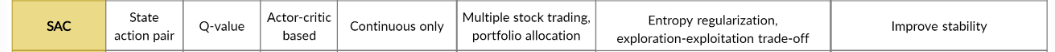

In [31]:
print("==============Model Training===========")
now = datetime.datetime.now().strftime("%Y%m%d-%Hh%M")

model_sac = agent.get_model("sac")
trained_sac = agent.train_model(model=model_sac, tb_log_name="sac", total_timesteps=80000 )

==============Model Training===========
{'batch_size': 64, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cuda device
Logging to tensorboard_log/sac/sac_1
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 69       |
|    time_elapsed    | 73       |
|    total timesteps | 5128     |
| train/             |          |
|    actor_loss      | 1.59e+03 |
|    critic_loss     | 945      |
|    ent_coef        | 0.162    |
|    ent_coef_loss   | 246      |
|    learning_rate   | 0.0001   |
|    n_updates       | 5027     |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 69       |
|    time_elapsed    | 146      |
|    total timesteps | 10256    |
| train/             |          |
|    actor_loss      | 2.19e+03 |
|    critic_loss     | 2.87e+03 |
|    ent

#Save Model

In [32]:
!mkdir -p saved_model
trained_sac.save('saved_model/my_modelBIST.h5') 

In [33]:
trained_sac

In [34]:
print("==============Start Trading===========")
e_trade_gym = StockTradingEnv(df=trade, turbulence_threshold=250, **env_kwargs)

df_account_value, df_actions = DRLAgent.DRL_prediction( model=trained_sac, environment = e_trade_gym)


==============Start Trading===========
hit end!


In [74]:
df_account_value

profit_list = []
ac_val = list(df_account_value["account_value"])
print(ac_val)
turn =len(ac_val)
for i in range(turn):
  
  if i != turn-1:

    diff = ac_val[i+1]  - ac_val[i]
    profit_list.append(diff)
  else:
    profit_list.append(float(0))
    
print(profit_list)


[1000000.0, 999573.4940071106, 999170.1192901612, 999044.9191309692, 998783.8023089889, 998325.3982152226, 993142.5750651124, 995809.4900040869, 995842.4444822315, 1001444.2127149825, 1003595.1359241728, 1000050.8565969231, 998284.55945282, 997171.4128206732, 998922.9448916198, 1003743.7138947488, 1002588.7370997908, 1000430.8208821777, 1001458.6791832689, 1001245.0579874043, 1001676.1746969942, 1004477.0311388258, 1000595.0177052979, 993435.9007402186, 993983.0502062087, 993302.6248217587, 991164.2989960675, 994391.5849196437, 999559.5354226354, 996148.5690785889, 999046.937837148, 1003616.2746936323, 1009867.0616321802, 1010333.7578522684, 1007592.3278065446, 1008150.4024268155, 1011270.1206485274, 1012774.1883227829, 999045.58989718, 1002754.6399805549, 1005208.8891139986, 1010175.1963446857, 1010745.043767524, 1006834.8640165807, 1005721.3498972179, 1017346.1996445418, 1019120.6295096874, 1019078.0328330994, 1022500.1010264398, 1019967.9380812884, 1020932.618309021, 1019703.9326674

In [83]:
new_df = df_account_value.copy()

new_df["diff"] = np.array(profit_list)

new_df

,date,account_value,diff
0,2020-07-27,1.000000e+06,-426.505993
1,2020-07-28,9.995735e+05,-403.374717
2,2020-07-29,9.991701e+05,-125.200159
3,2020-07-30,9.990449e+05,-261.116822
4,2020-08-04,9.987838e+05,-458.404094
...,...,...,...
244,2021-07-14,1.622069e+06,-24063.416015
245,2021-07-16,1.598006e+06,-20888.994990
246,2021-07-19,1.577117e+06,-30434.581590
247,2021-07-26,1.546683e+06,37734.057122


In [77]:
%matplotlib inline

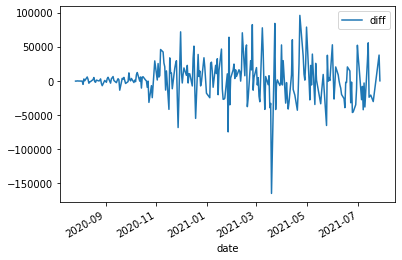

In [85]:
# hesaptaki günlük kar-zarar grafiği
new_df.plot(x='date', y='diff', kind = 'line')

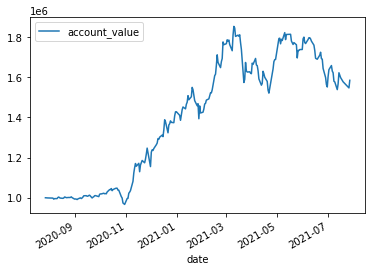

In [86]:
# total hesaptaki maliyetin değişimi
new_df.plot(x='date', y='account_value', kind = 'line')

In [90]:
df_actions

,AKBNK.IS,ARCLK.IS,BIMAS.IS,EREGL.IS,GARAN.IS,HALKB.IS,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,VAKBN.IS,VESTL.IS
date,,,,,,,,,,,,
2020-07-27,0,100,0,100,100,100,100,100,100,100,100,0
2020-07-28,0,100,0,100,100,100,100,100,100,100,100,0
2020-07-29,0,100,0,100,100,100,100,100,100,100,100,0
2020-07-30,0,100,0,100,100,100,100,100,100,100,100,0
2020-08-04,0,100,0,100,100,100,100,100,100,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-14,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-16,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
ticker_df = df_actions["VESTL.IS"]
ticker_df.sum()


0

# 1 Day test

In [93]:
print("==============Start Trading===========")
trade_1day = data_split(processed_full, "2021-07-10", "2021-07-17")

e_trade_gym_1day = StockTradingEnv(df=trade_1day, turbulence_threshold=250, **env_kwargs)

df_account_value_1day, df_actions_1day = DRLAgent.DRL_prediction( model=trained_sac, environment = e_trade_gym_1day)


==============Start Trading===========
hit end!


In [96]:
df_account_value_1day

,date,account_value
0,2021-07-12,1.000000e+06
1,2021-07-13,1.000128e+06
2,2021-07-14,1.000954e+06
3,2021-07-16,1.000596e+06


In [95]:
df_actions_1day

,AKBNK.IS,ARCLK.IS,BIMAS.IS,EREGL.IS,GARAN.IS,HALKB.IS,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,VAKBN.IS,VESTL.IS
date,,,,,,,,,,,,
2021-07-12,0,100,0,100,100,100,100,100,100,100,100,0
2021-07-13,0,100,0,100,100,100,100,100,100,100,100,0
2021-07-14,0,100,0,100,100,100,100,100,100,100,100,0


In [35]:
import os
cwd = os.getcwd()
cwd

'/content'

In [36]:
import os
os.chdir('/content/saved_model')


with open("./" + "/df_account_value_BIST" + now + ".csv", 'a') as f1:
    df_account_value.to_csv(f1, header=False)

with open("./"+ "/df_actions_BIST" + now + ".csv", 'a') as f2:
    df_actions.to_csv(f2, header=False)




#Backtesting 

In [37]:
print("==============Get Backtest Results===========")
perf_stats_all = backtest_stats(df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./" +"/perf_stats_all_BIST" + now + ".csv")


==============Get Backtest Results===========
Annual return          0.593226
Cumulative returns     0.584417
Annual volatility      0.300471
Sharpe ratio           1.707604
Calmar ratio           3.308525
Stability              0.837990
Max drawdown          -0.179302
Omega ratio            1.366527
Sortino ratio          2.636390
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.393927
Daily value at risk   -0.035820
dtype: float64


 #Understanding Format of Variables:

In [38]:
train

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,6.182181,6.182181,6.122160,6.165032,5.510608,13466375.0,AKBNK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
0,14.750000,14.950000,14.500000,14.600000,11.878804,1976842.0,ARCLK.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
0,23.525000,23.799999,23.325001,23.600000,19.072001,628882.0,BIMAS.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
0,3.990000,4.040000,3.960000,4.040000,1.965522,6776403.0,EREGL.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
0,7.900000,7.910000,7.740000,7.760000,6.942376,63095366.0,GARAN.IS,2015-07-27,0.000000,0.000000,66.666667,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,51.000000,51.900002,50.650002,51.349998,51.349998,2002048.0,PGSUS.IS,2020-07-24,-1.015999,46.712444,-87.886699,5.067109,2.554014
1281,9.150000,9.150000,9.050000,9.100000,8.755303,5455417.0,SAHOL.IS,2020-07-24,0.065249,52.595700,-79.706951,3.445070,2.554014
1281,10.004468,10.263843,9.930361,10.123040,10.123040,29892348.0,SASA.IS,2020-07-24,0.633239,68.646562,138.956885,47.425085,2.554014
1281,4.890000,4.920000,4.840000,4.880000,4.880000,39839221.0,VAKBN.IS,2020-07-24,-0.010792,48.479858,-67.830976,7.872245,2.554014


In [39]:
trade

,open,high,low,close,adj close,volume,tic,date,macd,rsi_30,cci_30,dx_30,turbulence
0,5.800000,5.810000,5.700000,5.720000,5.578002,43319180.0,AKBNK.IS,2020-07-27,-0.032535,45.321645,-107.064136,3.281478,6.141735
0,22.240000,22.540001,22.100000,22.160000,20.744827,10243494.0,ARCLK.IS,2020-07-27,1.084334,71.838800,145.124012,62.664200,6.141735
0,74.699997,75.900002,74.250000,74.300003,69.351898,2675233.0,BIMAS.IS,2020-07-27,1.951131,65.861834,192.733720,48.082447,6.141735
0,8.410000,8.510000,8.390000,8.470000,7.452500,36658368.0,EREGL.IS,2020-07-27,0.000343,50.769015,-40.977438,1.932329,6.141735
0,7.950000,7.960000,7.770000,7.800000,7.635209,98366875.0,GARAN.IS,2020-07-27,-0.083367,43.797485,-114.132586,16.189562,6.141735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,67.699997,71.949997,67.199997,71.400002,71.400002,3505926.0,PGSUS.IS,2021-07-27,-2.136392,44.699076,-115.962311,31.513849,7.048507
248,9.070000,9.300000,9.020000,9.290000,9.290000,17634418.0,SAHOL.IS,2021-07-27,0.000826,53.078843,5.758155,11.416987,7.048507
248,29.680000,30.299999,29.340000,29.540001,29.540001,15605997.0,SASA.IS,2021-07-27,-0.567082,47.213518,-26.532921,13.879146,7.048507
248,3.430000,3.440000,3.390000,3.420000,3.420000,30871452.0,VAKBN.IS,2021-07-27,-0.036190,42.210935,-143.798826,35.035782,7.048507


In [40]:
e_train_gym

In [41]:
agent

In [42]:
model_sac

In [43]:
trained_sac

In [44]:
e_trade_gym

In [45]:
df_account_value

,date,account_value
0,2020-07-27,1.000000e+06
1,2020-07-28,9.995735e+05
2,2020-07-29,9.991701e+05
3,2020-07-30,9.990449e+05
4,2020-08-04,9.987838e+05
...,...,...
244,2021-07-14,1.622069e+06
245,2021-07-16,1.598006e+06
246,2021-07-19,1.577117e+06
247,2021-07-26,1.546683e+06


In [46]:
df_actions

,AKBNK.IS,ARCLK.IS,BIMAS.IS,EREGL.IS,GARAN.IS,HALKB.IS,PETKM.IS,PGSUS.IS,SAHOL.IS,SASA.IS,VAKBN.IS,VESTL.IS
date,,,,,,,,,,,,
2020-07-27,0,100,0,100,100,100,100,100,100,100,100,0
2020-07-28,0,100,0,100,100,100,100,100,100,100,100,0
2020-07-29,0,100,0,100,100,100,100,100,100,100,100,0
2020-07-30,0,100,0,100,100,100,100,100,100,100,100,0
2020-08-04,0,100,0,100,100,100,100,100,100,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-13,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-14,0,0,0,0,0,0,0,0,0,0,0,0
2021-07-16,0,0,0,0,0,0,0,0,0,0,0,0
